<a href="https://colab.research.google.com/github/hardiksharma6555/MLP_code/blob/main/Week2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Math, Latex

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

heart_data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=cols)

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
print('Unique values in ca:', heart_data.ca.unique())
print('Unique values in thal:', heart_data.thal.unique())

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


In [ ]:
print('Number of missing vlaue in ca:',
      heart_data.loc[heart_data.ca == '?', 'ca'].count())
print('Number of missing vlaue in thal:',
      heart_data.loc[heart_data.thal == '?', 'thal'].count())

Number of missing vlaue in ca: 4
Number of missing vlaue in thal: 2


In [ ]:
heart_data.replace('?' ,np.nan ,inplace=True)

In [ ]:
from IPython.display import display, Math, Latex

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'] ,axis=1)

print('Number of features before transformation = ', wine_data.shape)

Number of features before transformation =  (1599, 11)


In [ ]:
poly = PolynomialFeatures(degree=2)
wine_data_poly = poly.fit_transform(wine_data) 
print('Number of features after transformation = ', wine_data_poly.shape)

Number of features after transformation =  (1599, 78)


In [ ]:
poly.get_feature_names_out()


array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

#Handling Imbalanced Data

In [1]:
from IPython.display import display, Math, Latex

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
wine_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

wine_data.shape

(1599, 12)

In [3]:
wine_data.info()
wine_data.quality.value_counts(ascending=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

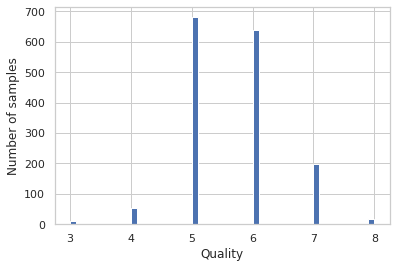

In [4]:
# display the histograms of the target variable 'quality'

wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

In [5]:
from imblearn.under_sampling import RandomUnderSampler

class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)


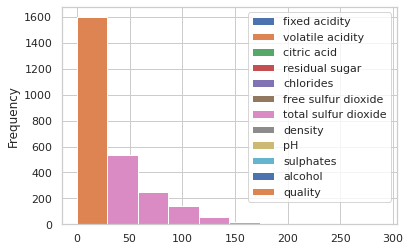

In [6]:
#class
class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()

# separate class
class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_3 = wine_data[wine_data['quality'] == 3]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]


# print the shape of the class
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)

wine_data.plot.hist()
plt.show()

In [7]:
# It allows you to count the items in an iterable list.
from collections import Counter

X = wine_data.drop(['quality'],axis=1)
y = wine_data['quality']